# Lab 8: Support Vector Machines (SVM)

In [344]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import plotly.express as px
import plotly.graph_objects as go

## Step 1: Exploratory Data Analysis (EDA)

In [345]:
data=pd.read_csv('C:\\Users\\Guest User\\Downloads\\drug200.csv')

In [346]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Exploration

In [347]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [348]:
for col in object_columns:
    print(col, data[col].unique(), data[col].unique().size)

Sex ['F' 'M'] 2
BP ['HIGH' 'LOW' 'NORMAL'] 3
Cholesterol ['HIGH' 'NORMAL'] 2
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'] 5


In [349]:
df = pd.DataFrame(data)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [350]:
# Encode categorical features
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['BP', 'Cholesterol'], drop_first=True) # getting columns specific to each category of the categorical columns
df

,Age,Sex,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,0,25.355,DrugY,False,False,False
1,47,1,13.093,drugC,True,False,False
2,47,1,10.114,drugC,True,False,False
3,28,0,7.798,drugX,False,True,False
4,61,0,18.043,DrugY,True,False,False
...,...,...,...,...,...,...,...
195,56,0,11.567,drugC,True,False,False
196,16,1,12.006,drugC,True,False,False
197,52,1,9.894,drugX,False,True,False
198,23,1,14.020,drugX,False,True,True


### For Binary classification -> DrugY versus rest

In [351]:
# Define the target variable for binary classification by SVM
df['Target'] = df['Drug'].apply(lambda x: 1 if x == 'DrugY' else 0)
df


,Age,Sex,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Target
0,23,0,25.355,DrugY,False,False,False,1
1,47,1,13.093,drugC,True,False,False,0
2,47,1,10.114,drugC,True,False,False,0
3,28,0,7.798,drugX,False,True,False,0
4,61,0,18.043,DrugY,True,False,False,1
...,...,...,...,...,...,...,...,...
195,56,0,11.567,drugC,True,False,False,0
196,16,1,12.006,drugC,True,False,False,0
197,52,1,9.894,drugX,False,True,False,0
198,23,1,14.020,drugX,False,True,True,0


In [352]:
df_dropped = df.drop('Drug',axis=1)
df_dropped

,Age,Sex,Na_to_K,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Target
0,23,0,25.355,False,False,False,1
1,47,1,13.093,True,False,False,0
2,47,1,10.114,True,False,False,0
3,28,0,7.798,False,True,False,0
4,61,0,18.043,True,False,False,1
...,...,...,...,...,...,...,...
195,56,0,11.567,True,False,False,0
196,16,1,12.006,True,False,False,0
197,52,1,9.894,False,True,False,0
198,23,1,14.020,False,True,True,0


In [353]:
# Calculate the correlation matrix
correlation_matrix = df_dropped.corr()

drug_correlation = correlation_matrix['Target'].drop('Target')

print(drug_correlation)

Age                  -0.031434
Sex                  -0.066724
Na_to_K               0.797612
BP_LOW                0.018942
BP_NORMAL            -0.084656
Cholesterol_NORMAL   -0.002712
Name: Target, dtype: float64


In [354]:
correlation_matrix

,Age,Sex,Na_to_K,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Target
Age,1.000000,0.102027,-0.063119,0.112909,-0.009025,-0.068234,-0.031434
Sex,0.102027,1.000000,-0.125008,0.058356,-0.036868,-0.008811,-0.066724
Na_to_K,-0.063119,-0.125008,1.000000,0.043345,-0.156355,0.010000,0.797612
BP_LOW,0.112909,0.058356,0.043345,1.000000,-0.443749,0.042036,0.018942
BP_NORMAL,-0.009025,-0.036868,-0.156355,-0.443749,1.000000,-0.145118,-0.084656
Cholesterol_NORMAL,-0.068234,-0.008811,0.010000,0.042036,-0.145118,1.000000,-0.002712
Target,-0.031434,-0.066724,0.797612,0.018942,-0.084656,-0.002712,1.000000


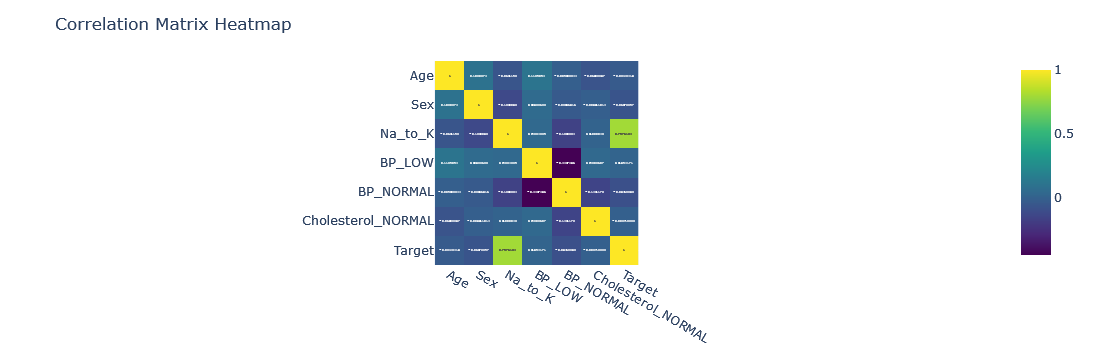

In [355]:
# Plotting the correlation heatmap using Plotly
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

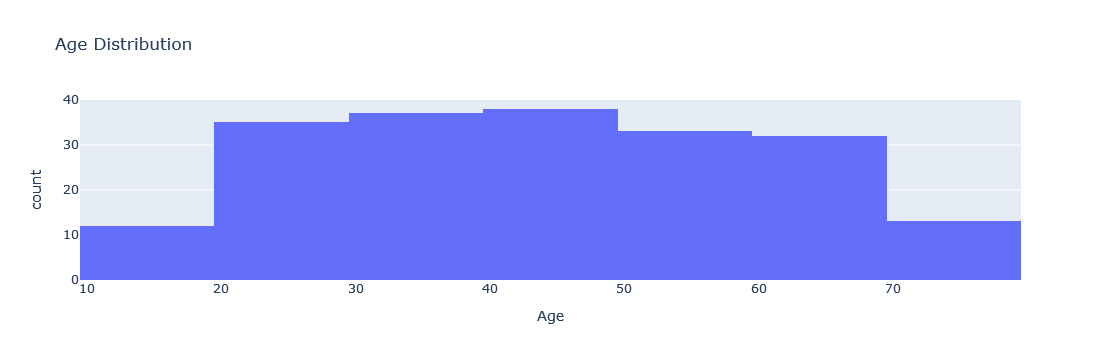

In [356]:
fig_age = px.histogram(df, x='Age', title='Age Distribution', nbins=10)
fig_age.show()


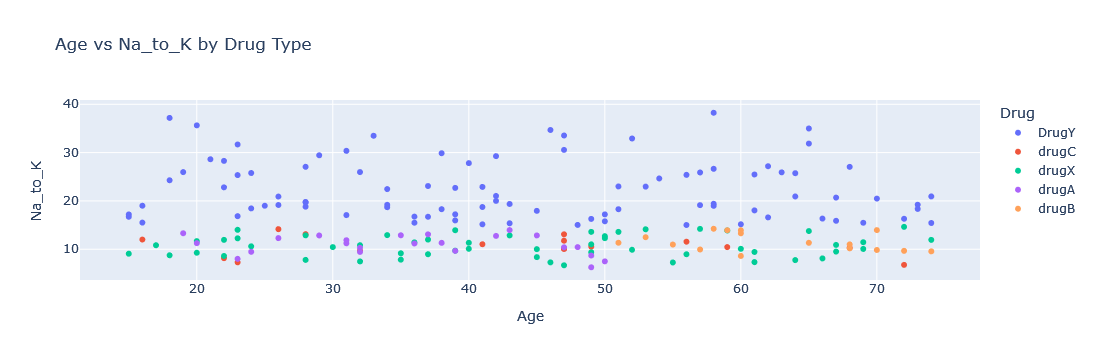

In [357]:
fig_scatter = px.scatter(df, x='Age', y='Na_to_K', color='Drug', title='Age vs Na_to_K by Drug Type')
fig_scatter.show()

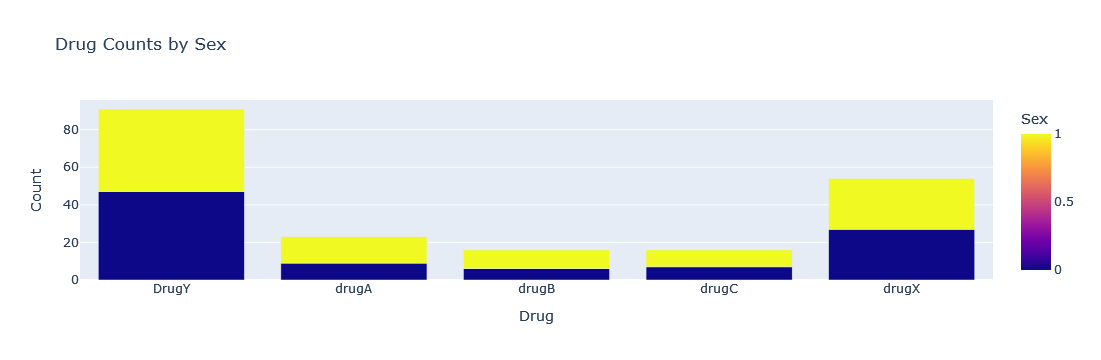

In [358]:
drug_sex_counts = df.groupby(['Drug', 'Sex']).size().reset_index(name='Count')
fig_grouped = px.bar(drug_sex_counts, x='Drug', y='Count', color='Sex', barmode='group', title='Drug Counts by Sex')
fig_grouped.show()

In [359]:
# Features and target
X = df.drop(columns=['Drug', 'Target'])
y = df['Target']

# Normalize numerical features
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])


In [360]:
X,y

(          Age  Sex   Na_to_K  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
 0   -1.291591    0  1.286522   False      False               False
 1    0.162699    1 -0.415145    True      False               False
 2    0.162699    1 -0.828558    True      False               False
 3   -0.988614    0 -1.149963   False       True               False
 4    1.011034    0  0.271794    True      False               False
 ..        ...  ...       ...     ...        ...                 ...
 195  0.708057    0 -0.626917    True      False               False
 196 -1.715759    1 -0.565995    True      False               False
 197  0.465676    1 -0.859089   False       True               False
 198 -1.291591    1 -0.286500   False       True                True
 199 -0.261469    0 -0.657170    True      False                True
 
 [200 rows x 6 columns],
 0      1
 1      0
 2      0
 3      0
 4      1
       ..
 195    0
 196    0
 197    0
 198    0
 199    0
 Name: Target, Length: 200, dtype: 

## Splitting data into training and testing

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training data and 20% test data

## Step 2: SVM Implementation from Scratch (Binary Classification)

You will now implement the Linear SVM for binary classification using the hinge loss and gradient descent for DrugY versus the rest.



Tasks:



1. Initialize weights, bias, and learning rate.

2. Implement the gradient descent update rule for the SVM.

3. Train the SVM using the hinge loss function.

4. Evaluate the model on the test set.

In [ ]:
import numpy as np

# SVM Parameters
class LinearSVM:
    def __init__(self, learning_rate=0.01, num_iterations=1000, C=1.0):
        self.alpha = learning_rate
        self.num_iter = num_iterations
        self.C = C
        # Initialize weights and bias
        self.W = None
        self.b = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.W = np.zeros(num_features)
        self.b = 0

        for _ in range(self.num_iter):
            loss = self.hinge_loss(self.W, self.b, X, y)
            grad_W, grad_b = self.gradient(X, y)
            
            self.W = self.W - self.alpha * grad_W
            self.b = self.b - self.alpha * grad_b
            
    # Hinge Loss function
    def hinge_loss(self, w, b, X, y):
        distances = 1 - y * (np.dot(X, w) + b)
        loss = self.C*np.sum(np.maximum(0, distances))  # hinge loss
        reg_loss = np.dot(w, w)  # Regularization term
        return loss + reg_loss
        
    # Gradient Descent Update
    def gradient(self, X, y):
        grad_W = np.zeros(len(self.W))
        grad_b = 0

        for i in range(len(y)):
            if y[i] * (np.dot(X[i], self.W) + self.b) < 1:
                grad_W = grad_W - y[i] * X[i]
                grad_b = grad_b - y[i]
            else:
                grad_W = grad_W + (1/ (2*(self.C)) )* self.W
        
        # Average gradients and include regularization term
        #grad_b = grad_b / X.shape[0]  # Average bias gradient
        #grad_W = grad_W / X.shape[0]
        
        return grad_W, grad_b

    # Prediction Function
    def predict(self, X):
        linear_output = np.dot(X, self.W) + self.b
        return np.where(linear_output >= 0, 1, -1)

    # Evaluation
    def evaluate(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return (predictions, accuracy)


In [363]:
X_train.values

array([[-0.07968295507078865, 1, -0.09832049485154556, True, False,
        False],
       [-0.2008737612621024, 0, 0.9465216764538248, False, True, True],
       [0.7080572851727507, 1, -0.14841851900365574, True, False, False],
       [1.5563929285119469, 1, -0.86533373443247, False, False, False],
       [-0.5038507767403868, 0, -0.6781253283903734, False, False, False],
       [0.16269865731183886, 1, -0.7884520020771538, False, False, False],
       [-0.5644461798360436, 1, -1.1434402175372598, False, True, True],
       [1.2534159130336626, 1, -0.6584191803859424, False, False, True],
       [-1.1098048076969556, 0, -0.2670717341007592, True, False, False],
       [-0.8068277922186712, 1, 1.9819271008274952, False, False, False],
       [-1.776354241749181, 0, 0.08888791119055117, False, False, True],
       [1.6775837347032607, 0, -0.20018185143783082, True, False, True],
       [-0.32206456745341616, 1, -0.2978799373189544, True, False, True],
       [-0.7462323891230143, 1, -0

In [364]:
df_y = y_train.reset_index()
df_y

,index,Target
0,12,1
1,73,1
2,94,1
3,186,0
4,76,0
...,...,...
155,172,1
156,176,0
157,157,1
158,111,0


In [365]:
df_y['Target']

0      1
1      1
2      1
3      0
4      0
      ..
155    1
156    0
157    1
158    0
159    1
Name: Target, Length: 160, dtype: int64

In [366]:
df_y['Target'].replace(0, -1, inplace=True)
df_y

,index,Target
0,12,1
1,73,1
2,94,1
3,186,-1
4,76,-1
...,...,...
155,172,1
156,176,-1
157,157,1
158,111,-1


In [367]:
y_array = df_y['Target'].values
y_array

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1], dtype=int64)

In [368]:
print(X_train.dtypes)

Age                   float64
Sex                     int32
Na_to_K               float64
BP_LOW                   bool
BP_NORMAL                bool
Cholesterol_NORMAL       bool
dtype: object


In [369]:
svm = LinearSVM(learning_rate=0.001, num_iterations=1000)
svm.fit(X_train.values, y_array)

In [370]:
df_y_test = y_test.reset_index()
df_y_test

,index,Target
0,19,1
1,140,0
2,77,1
3,104,1
4,84,0
5,151,0
6,192,1
7,38,0
8,119,1
9,97,1


In [371]:
df_y_test['Target'].replace(0, -1, inplace=True)

C:\Users\Guest User\AppData\Local\Temp\ipykernel_4168\1477674320.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [372]:
y_test_array = df_y_test['Target'].values
y_test_array

array([ 1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1, -1, -1], dtype=int64)

In [373]:
svm.evaluate(X_test, y_test_array)

(array([ 1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
         1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
         1,  1,  1, -1, -1, -1]),
 0.9)

In [374]:
predictions, accuracy = svm.evaluate(X_test, y_test_array)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 90.00%


In [375]:
predictions, y_test

(array([ 1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
         1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
         1,  1,  1, -1, -1, -1]),
 19     1
 140    0
 77     1
 104    1
 84     0
 151    0
 192    1
 38     0
 119    1
 97     1
 71     1
 68     1
 86     0
 134    1
 69     1
 102    0
 41     0
 177    1
 82     0
 88     1
 149    0
 190    1
 175    1
 34     0
 123    1
 61     0
 141    1
 62     1
 173    1
 156    0
 89     1
 15     1
 81     0
 51     0
 21     1
 13     1
 96     1
 174    0
 103    0
 83     0
 Name: Target, dtype: int64)

## Compare your performance with inbuilt functions

In [376]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [382]:
from sklearn.svm import LinearSVC

In [384]:
svm_sklearn = LinearSVC(max_iter=1000, C=1.0)  # C is the inverse of regularization strength
svm_sklearn.fit(X_train.values, y_array)
accuracy_sklearn = svm_sklearn.score(X_test, y_test_array)
print(f"Scikit-learn Linear SVM accuracy: {accuracy_sklearn * 100:.2f}%")

Scikit-learn Linear SVM accuracy: 100.00%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LinearSVC was fitted without feature names



## Step 3: Impact of Slack Variable

Now, you will explore the effect of the slack variable

C on the performance of your SVM model. Try various values of

C and observe how it impacts the decision boundary and classification performance.



Tasks:



1. Modify the C parameter in the SVM implementation.

2. Train the SVM with different values of C.

3. Evaluate and compare the accuracy for each value of C.

In [379]:
# Different values for C
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
accuracies = []

for C in C_values:
    # Train the SVM model with the current value of C
    svm = LinearSVM(learning_rate=0.001, num_iterations=1000,  C=C)
    svm.fit(X_train.values, y_array)

    # Evaluate the model
    _, accuracy = svm.evaluate(X_test, y_test_array)
    accuracies.append(accuracy)
    print(f"C: {C}, Accuracy: {accuracy * 100:.2f}%")



C: 0.01, Accuracy: 42.50%
C: 0.1, Accuracy: 67.50%
C: 1.0, Accuracy: 90.00%
C: 10.0, Accuracy: 97.50%
C: 100.0, Accuracy: 97.50%


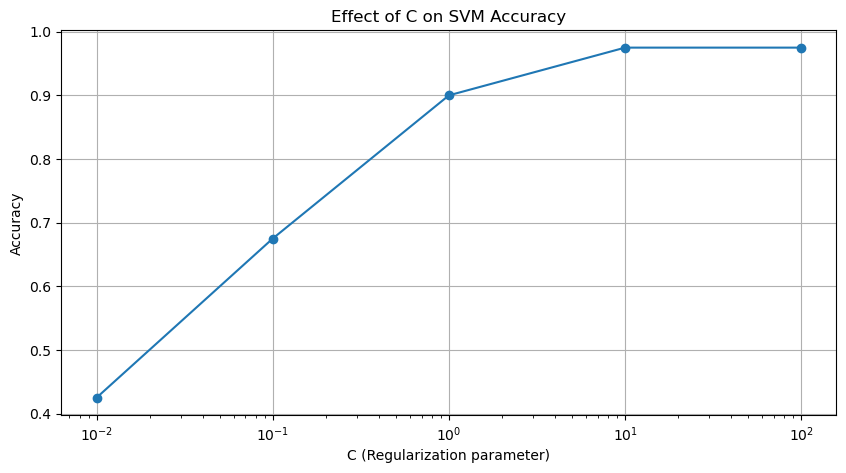

In [380]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Accuracy')
plt.grid(True)
plt.show()
